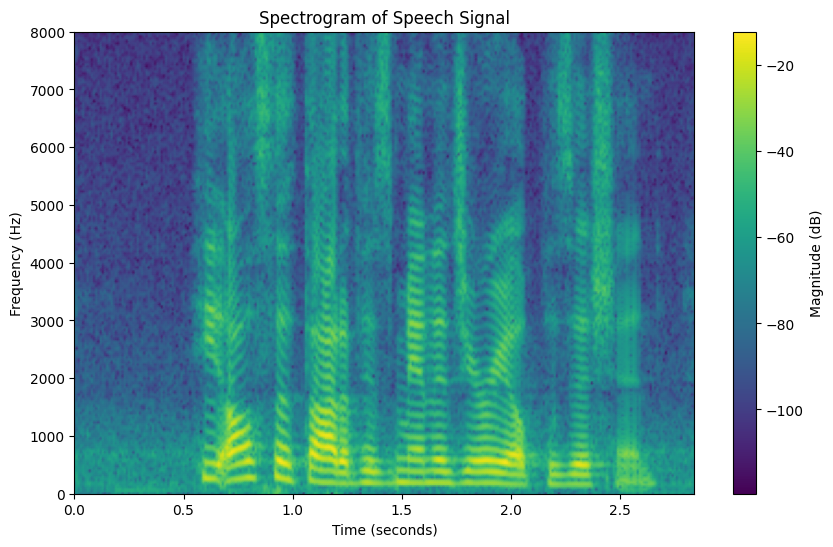

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wav

sample_rate, speech_signal = wav.read('data/02_native.wav')

# Convert stereo to mono if needed
if speech_signal.ndim > 1:
    speech_signal = speech_signal[:, 0]

# Preprocess the signal: normalize signal
speech_signal = speech_signal / np.max(np.abs(speech_signal))

# Define parameters for STFT
window_size = int(0.025 * sample_rate)  # 25 ms window
hop_size = int(0.010 * sample_rate)     # 10 ms hop size    
window = signal.windows.hann(window_size)

# Compute STFT
frequencies, times, spectrogram = signal.stft(speech_signal, fs=sample_rate, window=window, nperseg=window_size, noverlap=window_size - hop_size)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(spectrogram) + 1e-6), shading='gouraud', cmap='viridis')
plt.title('Spectrogram of Speech Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.colorbar(label='Magnitude (dB)')
plt.ylim(0, 8000)
plt.show()

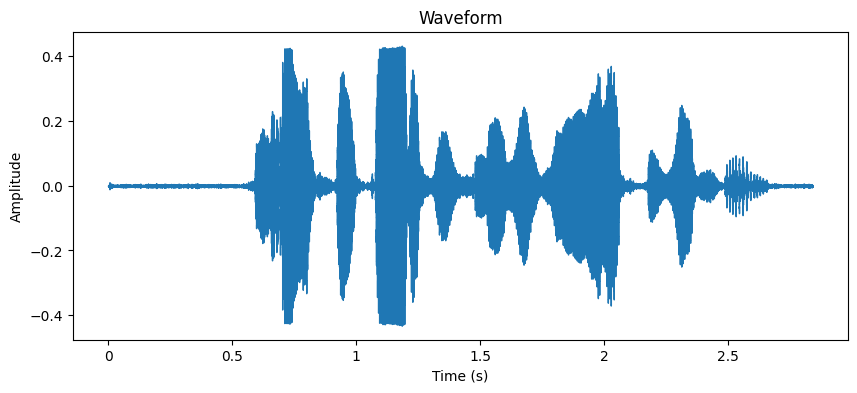

MFCC shape: (13, 285)


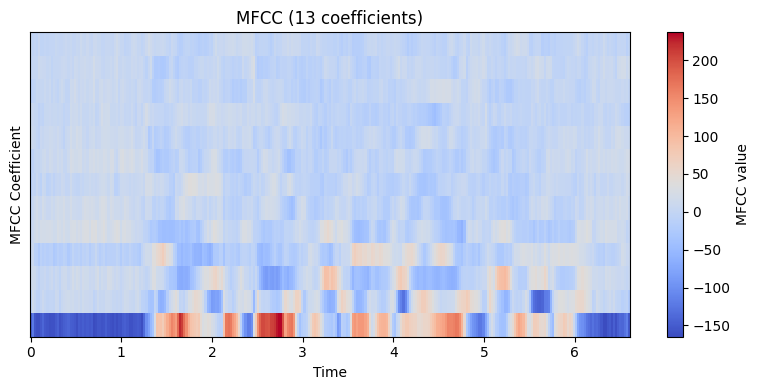

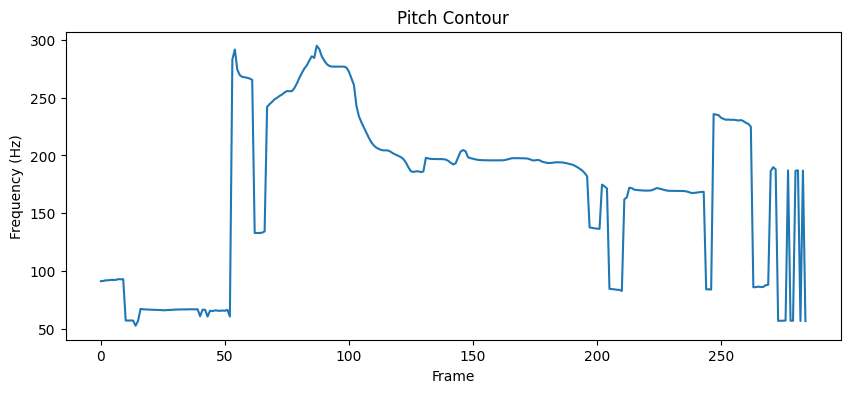

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

audio_path = 'data/02_native.wav'
display(Audio(audio_path))

y, sr = librosa.load(audio_path, sr=16000)
y = y[:sr * 10]  # Use only first 5 seconds
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=512, hop_length=160)
mfcc = mfcc - np.mean(mfcc, axis=1, keepdims=True) # Mean normalization
print("MFCC shape:", mfcc.shape)
plt.figure(figsize=(8, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(label="MFCC value")
plt.ylabel("MFCC Coefficient")
plt.title("MFCC (13 coefficients)")
plt.tight_layout()
plt.show()

pitch = librosa.yin(y, fmin=50,fmax=300, sr=sr, hop_length=160)
plt.figure(figsize=(10, 4))
plt.plot(pitch)
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Pitch Contour")
plt.show()
